## Patient Health Analysis (Coronary Heart Disease)

### Objective: 
The goal of this analysis is to build a model that predicts coronary heart disease (CHD) risk in patients, providing valuable insights for early intervention, improved patient care, and better management of healthcare resources.


### 1. Data Loading & Preprocessing

In this section, we will load the dataset, check for missing values, and perform necessary preprocessing steps such as label encoding and imputation.


### Import necessary libraries

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense
from sklearn.impute import SimpleImputer
import joblib

### 1. Data Loading & Preprocessing

In [9]:
# 1. Data Loading & Preprocessing
data_path = "C:/Users/sowjanya/Desktop/Data_Analytics-and-Data-Science-Portfolio/Patient Health Analysis (coronary heart disease)/coronary heart disease.csv"
df = pd.read_csv(data_path)

# Check the data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 2. Handling Missing Values (Imputation)
label_encoder = LabelEncoder()
df['famhist'] = label_encoder.fit_transform(df['famhist'])  # 'Present' becomes 1 and 'Absent' becomes 0

# Categorical and numerical columns
categorical_columns = ['famhist']
numerical_columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

# Impute missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Verify no missing values
print(df.isnull().sum())

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    i

#### 2. Exploratory Data Analysis (EDA)
In this section, we perform exploratory analysis to visualize distributions and correlations, helping us understand the data better.

##### Distribution of Coronary Heart Disease (CHD):

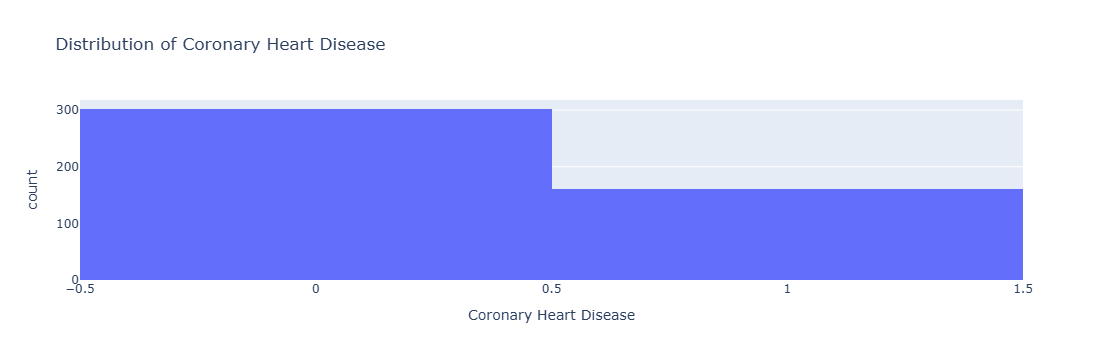

In [13]:
# Distribution of coronary heart disease
fig = px.histogram(df, x='chd', title='Distribution of Coronary Heart Disease', labels={'chd': 'Coronary Heart Disease'})
fig.show()


##### Correlation Matrix:

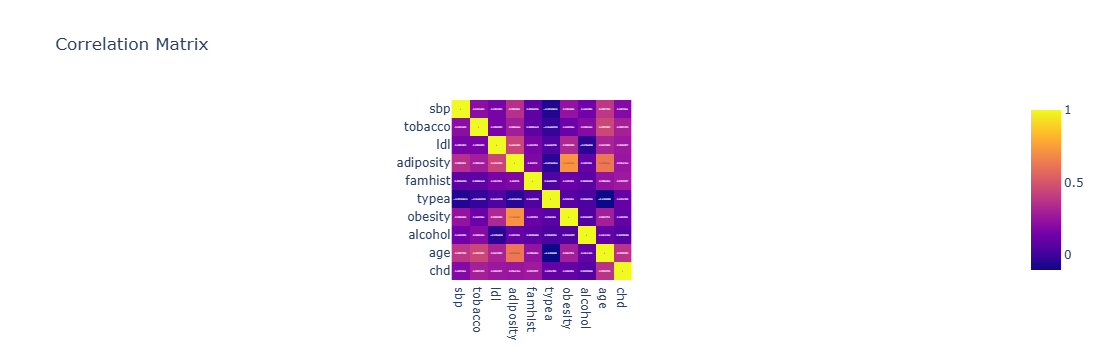

In [18]:
# Correlation Matrix Heatmap
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, text_auto=True, title="Correlation Matrix")
fig.show()


##### Box Plot for Numerical Features:

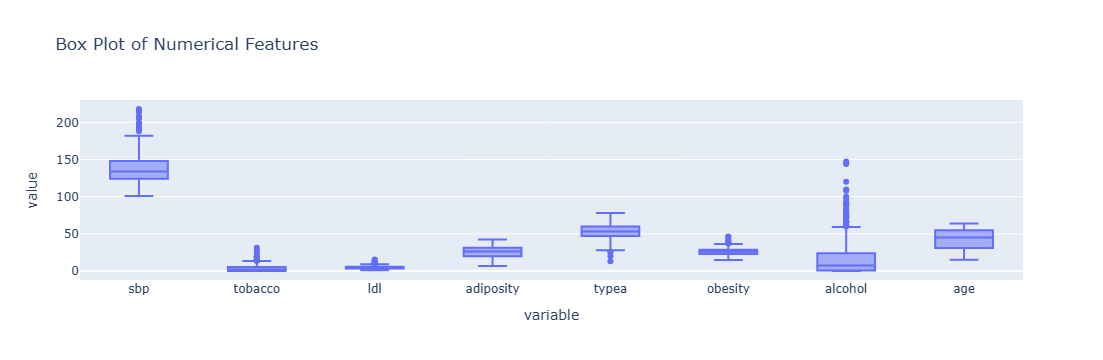

In [21]:
# Box Plot for Numerical Features (To check for outliers)
fig = px.box(df, y=numerical_columns, title="Box Plot of Numerical Features")
fig.show()


##### Pair Plot:

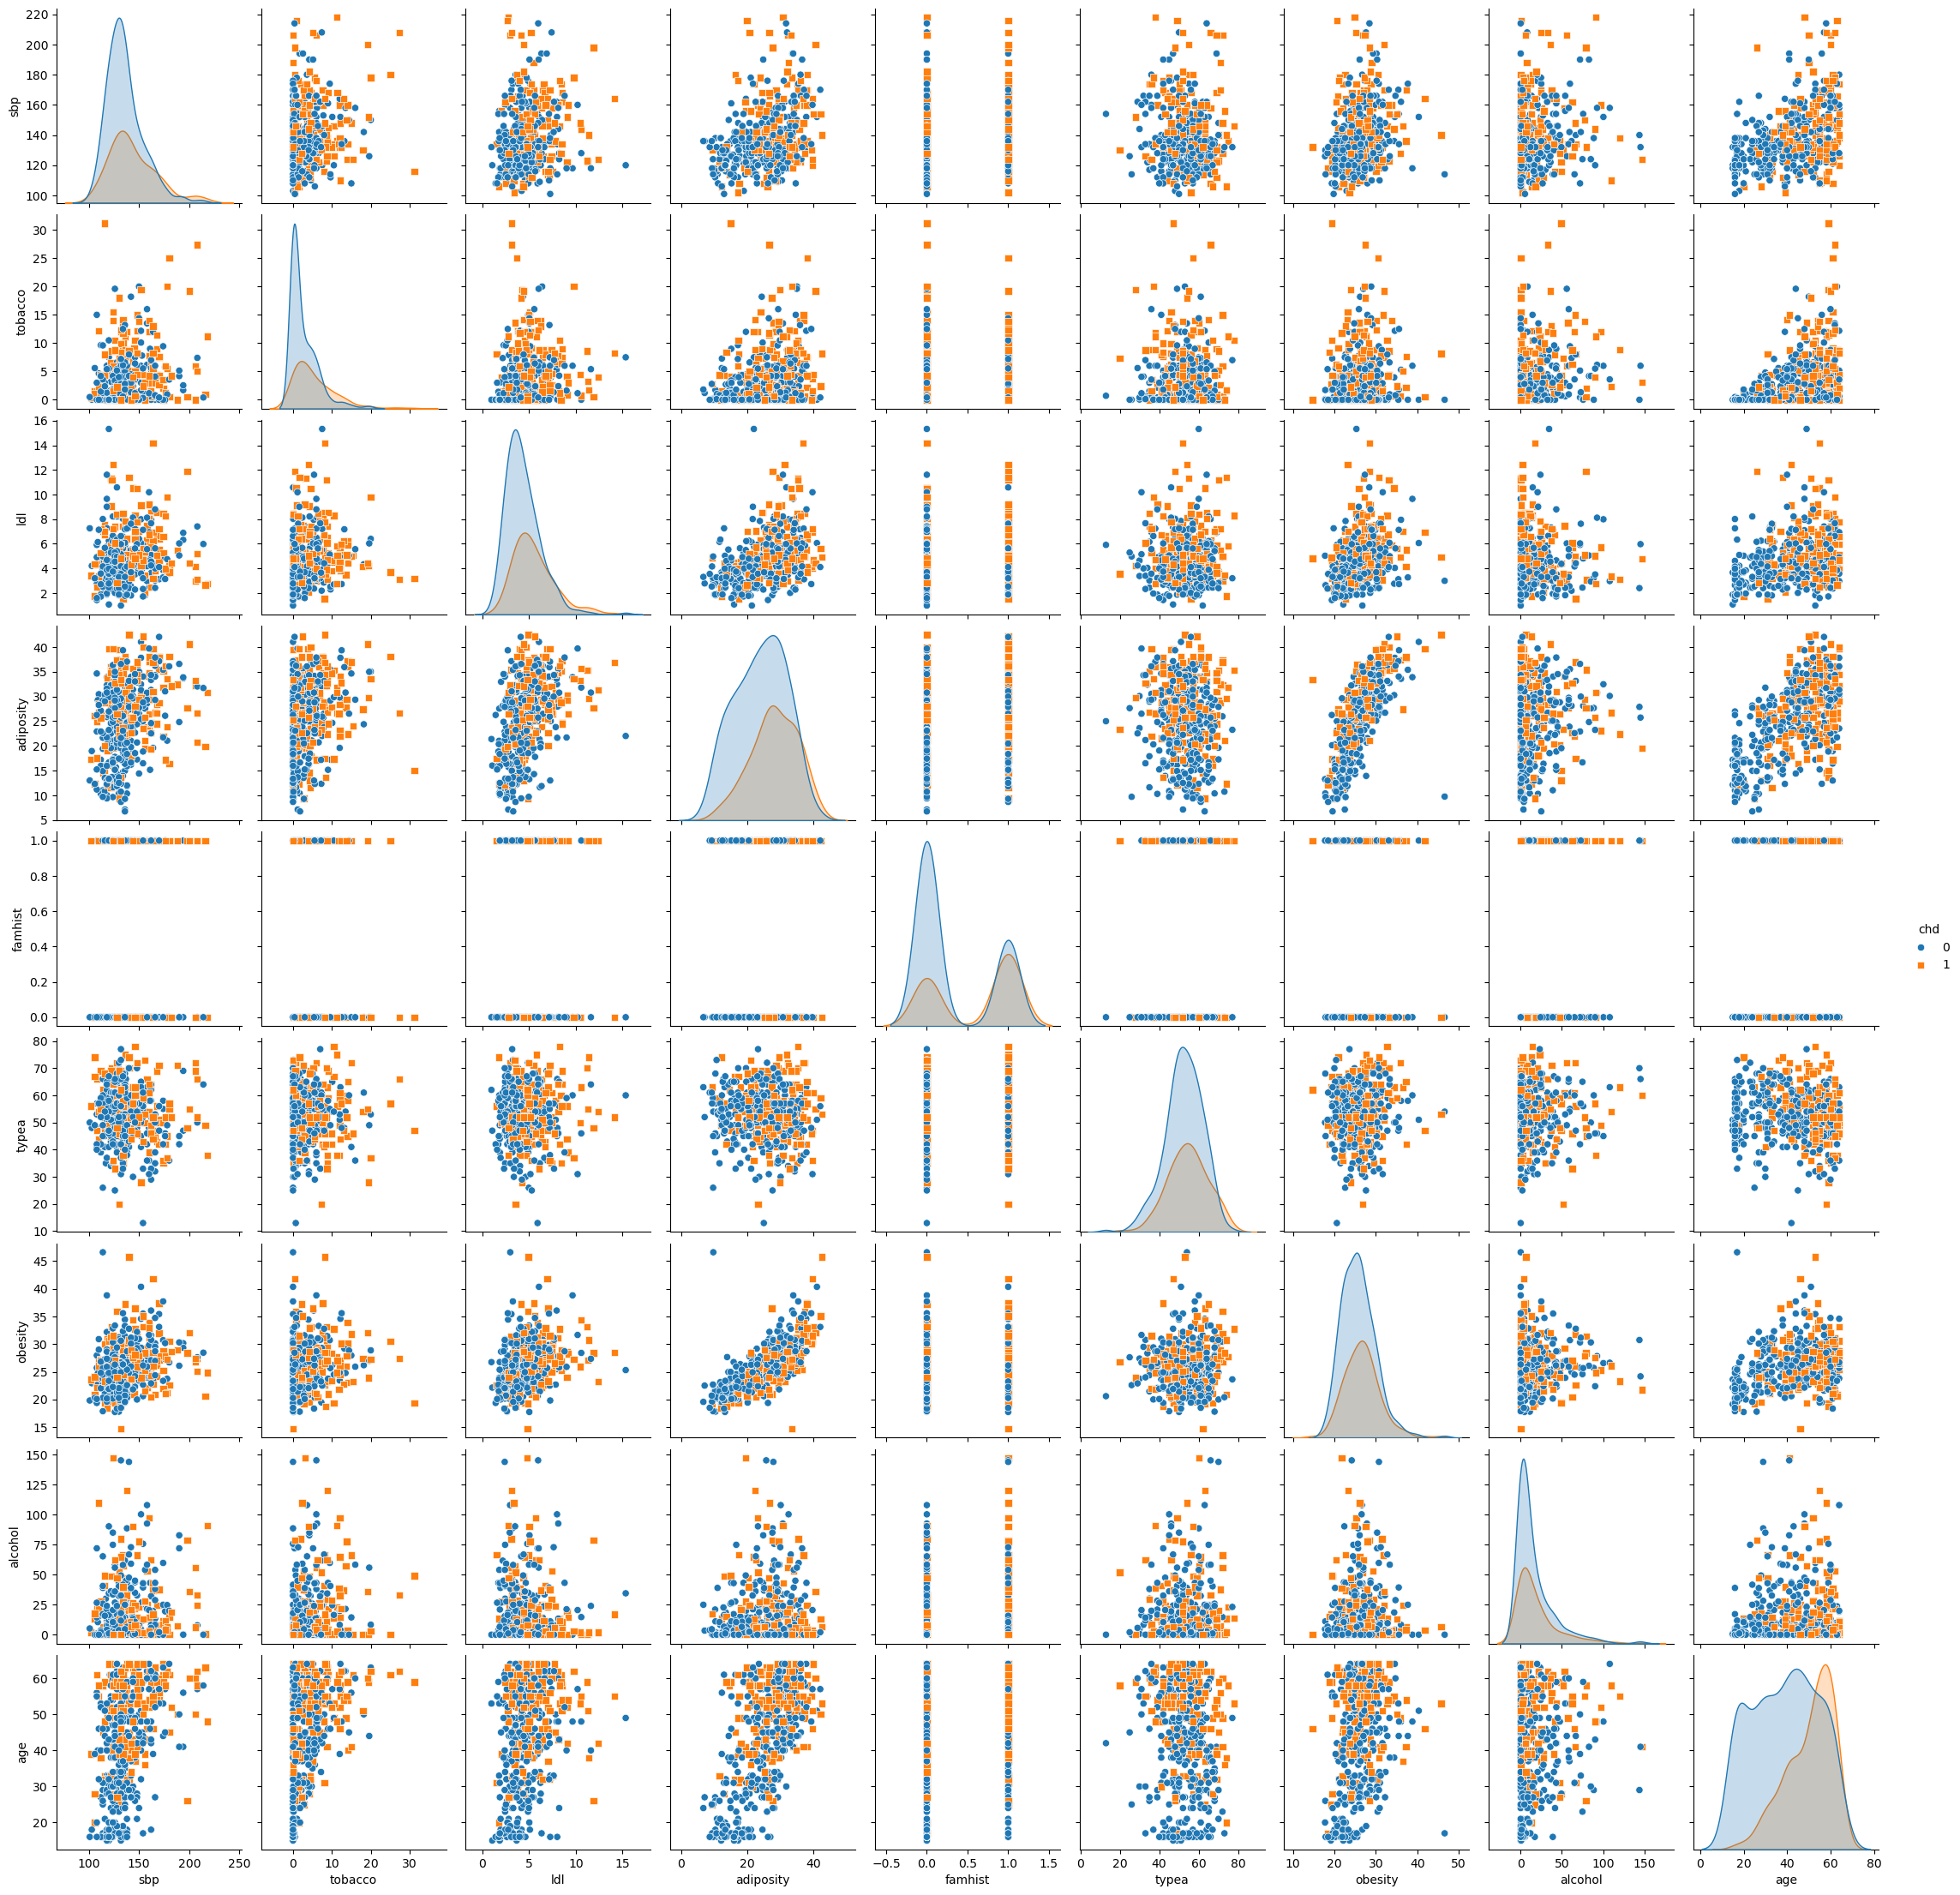

In [24]:
# Pair Plot to see relationships between features
sns.pairplot(df, hue="chd", diag_kind="kde", markers=["o", "s"])
import matplotlib.pyplot as plt
plt.show()


#### 3. Feature Engineering
We perform feature scaling and prepare the dataset for model training.

In [27]:
# 4. Feature Engineering
X = df.drop('chd', axis=1)
y = df['chd']

# Scale the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### 4. Train-Test Split
Here we split the data into training and testing sets.

In [30]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### 5. Model Training and Evaluation
We will train three models: Logistic Regression, Random Forest, and Neural Network (ANN) to predict the likelihood of coronary heart disease. The evaluation will be based on accuracy, ROC curve, and ROC-AUC score.

##### Logistic Regression:

Logistic Regression Evaluation:
Accuracy: 0.7849462365591398
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84        59
           1       0.79      0.56      0.66        34

    accuracy                           0.78        93
   macro avg       0.79      0.74      0.75        93
weighted avg       0.79      0.78      0.77        93

Confusion Matrix:
 [[54  5]
 [15 19]]


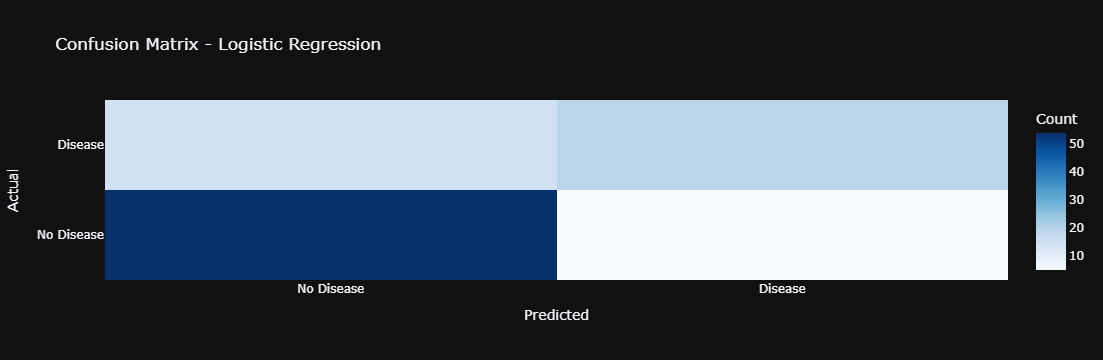

In [56]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Plot Confusion Matrix for Logistic Regression (Plotly)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
fig_log = go.Figure(data=go.Heatmap(
    z=conf_matrix_log,
    x=['No Disease', 'Disease'],
    y=['No Disease', 'Disease'],
    colorscale='Blues',
    colorbar=dict(title='Count'),
    showscale=True
))
fig_log.update_layout(
    title='Confusion Matrix - Logistic Regression',
    xaxis_title='Predicted',
    yaxis_title='Actual',
    template='plotly_dark'
)
fig_log.show()


##### Random Forest Classifier:


Random Forest Classifier Evaluation:
Accuracy: 0.6989247311827957
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77        59
           1       0.61      0.50      0.55        34

    accuracy                           0.70        93
   macro avg       0.67      0.66      0.66        93
weighted avg       0.69      0.70      0.69        93

Confusion Matrix:
 [[48 11]
 [17 17]]


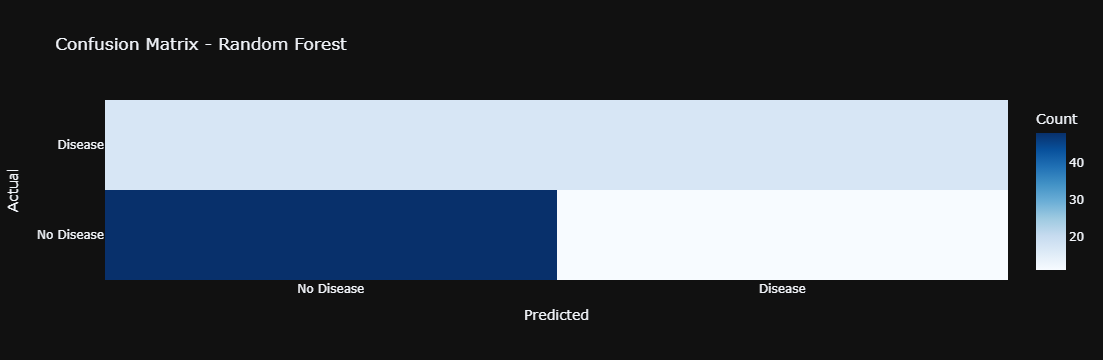

In [58]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Classifier Evaluation
print("\nRandom Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot Confusion Matrix for Random Forest (Plotly)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
fig_rf = go.Figure(data=go.Heatmap(
    z=conf_matrix_rf,
    x=['No Disease', 'Disease'],
    y=['No Disease', 'Disease'],
    colorscale='Blues',
    colorbar=dict(title='Count'),
    showscale=True
))
fig_rf.update_layout(
    title='Confusion Matrix - Random Forest',
    xaxis_title='Predicted',
    yaxis_title='Actual',
    template='plotly_dark'
)
fig_rf.show()


##### Neural Network (ANN):

Epoch 1/50


C:\Users\sowjanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4392 - loss: 0.7296 
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6440 - loss: 0.6439
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.5934
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7311 - loss: 0.5455
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.5502
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7606 - loss: 0.5193
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7493 - loss: 0.5102
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7851 - loss: 0.4774
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.4814
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.5344
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7556 - loss: 0.4785
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7615 - loss: 0.4977

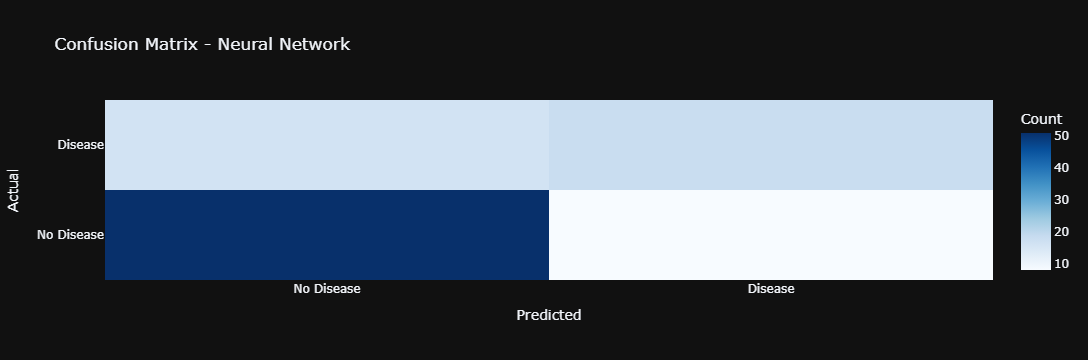

In [60]:
# Neural Network (ANN)
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input layer
ann_model.add(Dense(units=32, activation='relu'))  # Hidden layer
ann_model.add(Dense(units=1, activation='sigmoid'))  # Output layer

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict using Neural Network
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

# Neural Network Evaluation
print("\nNeural Network Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))

# Plot Confusion Matrix for Neural Network (Plotly)
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
fig_ann = go.Figure(data=go.Heatmap(
    z=conf_matrix_ann,
    x=['No Disease', 'Disease'],
    y=['No Disease', 'Disease'],
    colorscale='Blues',
    colorbar=dict(title='Count'),
    showscale=True
))
fig_ann.update_layout(
    title='Confusion Matrix - Neural Network',
    xaxis_title='Predicted',
    yaxis_title='Actual',
    template='plotly_dark'
)
fig_ann.show()


#### 6. Model Comparison by ROC Curves
In this section, we compare the models using their ROC curves and ROC-AUC scores.

##### ROC Curves for All Models:

In [41]:
# ROC Curves for All Models
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_model.predict(X_test).ravel())

# Plot ROC Curves for All Models
fig_roc = go.Figure()

# Adding Logistic Regression ROC curve
fig_roc.add_trace(go.Scatter(x=fpr_log, y=tpr_log, mode='lines', name='Logistic Regression', line=dict(dash='solid')))

# Adding Random Forest ROC curve
fig_roc.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name='Random Forest', line=dict(dash='dot')))

# Adding Neural Network ROC curve
fig_roc.add_trace(go.Scatter(x=fpr_ann, y=tpr_ann, mode='lines', name='Neural Network', line=dict(dash='dash')))

# Adding the diagonal line (Random Classifier)
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dashdot', color='grey')))

# Update layout
fig_roc.update_layout(
    title="Model Comparison by ROC Curve",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    showlegend=True,
    template='plotly_dark'
)

fig_roc.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


##### Model Comparison by ROC-AUC:

In [43]:
# 8. Model Comparison Based on ROC-AUC Scores
roc_auc_log = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_ann = roc_auc_score(y_test, ann_model.predict(X_test).ravel())

print("\nROC-AUC Scores:")
print(f"Logistic Regression ROC-AUC: {roc_auc_log}")
print(f"Random Forest ROC-AUC: {roc_auc_rf}")
print(f"Neural Network ROC-AUC: {roc_auc_ann}")

# 9. ROC-AUC Comparison Bar Plot
roc_auc_scores = [roc_auc_log, roc_auc_rf, roc_auc_ann]
models = ['Logistic Regression', 'Random Forest', 'Neural Network']

fig_auc = px.bar(x=models, y=roc_auc_scores, labels={'x': 'Model', 'y': 'ROC-AUC'}, title='Model Comparison by ROC-AUC')
fig_auc.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

ROC-AUC Scores:
Logistic Regression ROC-AUC: 0.8010967098703888
Random Forest ROC-AUC: 0.727567298105683
Neural Network ROC-AUC: 0.7457627118644068


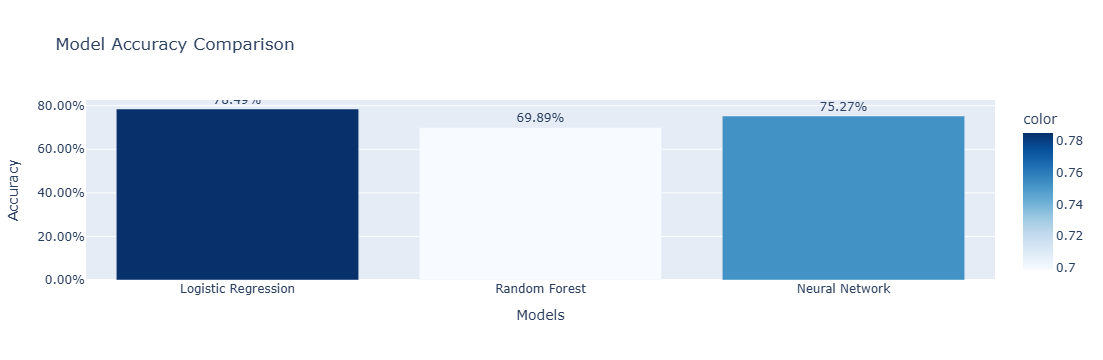

In [64]:
import plotly.express as px

# Model names and their respective accuracy scores
models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracies = [0.7849, 0.6989, 0.7527]

# Create a bar chart
fig = px.bar(x=models, y=accuracies, text=accuracies, labels={'x': 'Models', 'y': 'Accuracy'},
             title="Model Accuracy Comparison", color=accuracies, color_continuous_scale='blues')

fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(yaxis=dict(tickformat=".2%"))
fig.show()


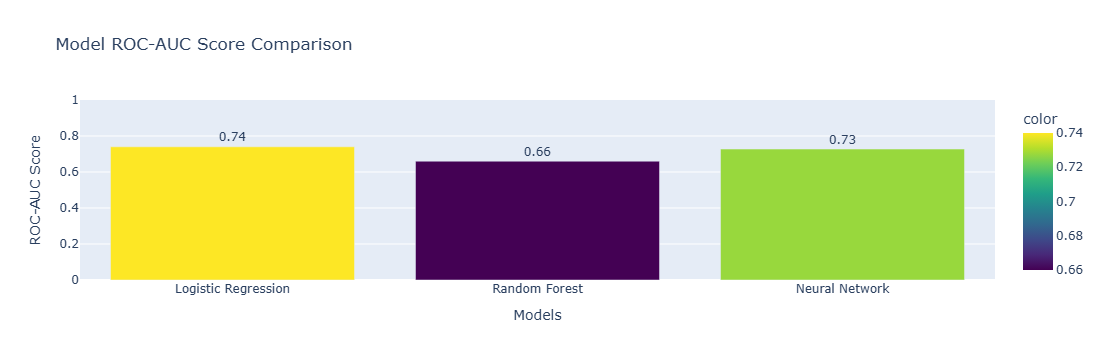

In [68]:
# ROC-AUC Scores
roc_auc_scores = [0.74, 0.66, 0.7275]  # Example values
models = ['Logistic Regression', 'Random Forest', 'Neural Network']

# Create a bar chart
fig = px.bar(x=models, y=roc_auc_scores, text=roc_auc_scores, labels={'x': 'Models', 'y': 'ROC-AUC Score'},
             title="Model ROC-AUC Score Comparison", color=roc_auc_scores, color_continuous_scale='viridis')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, 1]))  # ROC-AUC values range between 0 and 1
fig.show()


#### 7. Final Model Recommendation
Based on the performance evaluation (both ROC-AUC and accuracy), we will save the best-performing model for future use.

In [45]:
# 10. Final Model Recommendation
best_model = log_model  # Best model identified from evaluation (could be changed to rf_model or ann_model)
best_model_name = "Logistic Regression"

# Specify the directory to save the model
save_path = "C:/Users/sowjanya/Desktop/Data_Analytics-and-Data-Science-Portfolio/Patient Health Analysis (coronary heart disease)/models/best_coronary_heart_disease_model.pkl"

# Save the best model using joblib
joblib.dump(best_model, save_path)

print(f"Best model ({best_model_name}) saved to: {save_path}")


Best model (Logistic Regression) saved to: C:/Users/sowjanya/Desktop/Data_Analytics-and-Data-Science-Portfolio/Patient Health Analysis (coronary heart disease)/models/best_coronary_heart_disease_model.pkl


# 📊 Analysis and Outcomes of the Model Results

## ✅ 1. Achievements from the Results

- **Logistic Regression**:  
  - Accuracy: **78.49%**  
  - Balanced precision (**0.79**) and recall (**0.74**).  
  - Performs well in identifying high-risk patients but has some misclassifications, especially in predicting positive cases.  

- **Random Forest Classifier**:  
  - Accuracy: **69.89%**  
  - Performs better in identifying negative cases (**precision: 0.74**) but struggles with recall for high-risk patients.  

- **Neural Network Model**:  
  - Accuracy: **75.26%**  
  - Slightly better than Random Forest but lower than Logistic Regression.  
  - ROC-AUC score of **0.72**, indicating a fair ability to distinguish between at-risk and non-risk patients.  

---

## 🏥 2. Usefulness for the Healthcare Sector

- **📌 Early Identification of High-Risk Patients**  
  - Logistic Regression performs best in predicting coronary heart disease risks, allowing **early medical interventions**.

- **🏥 Improved Patient Care**  
  - Helps doctors **personalize treatment plans** and prioritize patients needing **immediate attention**.

- **💰 Cost Reduction**  
  - Early risk identification helps **prevent major health complications**, reducing hospital stays and emergency care costs.

- **🔄 Efficient Resource Allocation**  
  - Medical professionals can **focus on high-risk patients**, ensuring **optimal utilization of healthcare resources**.

- **📊 Continuous Monitoring and Updates**  
  - The model can be integrated into **healthcare systems** to **update patient risk profiles** over time, improving long-term health outcomes.

---

### 🚑💡 These predictive models provide a strong foundation for **proactive disease management** and **preventive care strategies**, improving overall patient care!
